In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning) 

In [29]:
df = pd.read_csv('df_combined_with_year.csv')

df = df[df['Month'] != 'Ave']

df_new = df.drop(columns=['All items'])



df_new

,Month,Year,Food and Non-Alcoholic Beverages,Alcoholic Beverages and Tobacco,Clothing and Footwear,"Housing, Water, Electricity, Gas and Other Fuels","Furnishings, Household Equipment and Routine Household Maintenance",Health,Transport,Information and Communication,"Recreation, Sport and Culture",Education Services,Restaurants and Accommodation Services,Financial Services,"Personal Care, and Miscellaneous Goods and Services"
0,Jan,2024,128.9,174.7,117.0,118.8,120.2,121.5,128.9,103.1,114.5,115.4,125.6,142.4,118.4
1,Feb,2024,129.3,175.9,117.4,119.8,120.7,122.0,130.6,103.1,114.9,115.4,126.5,142.4,119.0
2,Mar,2024,128.9,176.3,117.9,119.8,121.1,122.4,130.9,103.1,115.2,115.4,127.5,142.4,119.3
3,Apr,2024,128.7,176.5,118.2,119.2,121.2,122.5,131.7,103.2,115.4,115.4,127.8,142.4,119.6
4,May,2024,128.7,176.8,118.4,119.8,121.5,122.7,131.1,103.2,115.5,115.4,128.2,142.4,119.8
5,Jun,2024,129.5,177.0,118.5,118.4,121.6,122.9,130.7,103.2,115.7,115.4,128.4,142.4,120.0
6,Jul,2024,130.4,177.0,118.7,120.0,121.8,123.1,131.5,103.2,115.9,118.1,128.6,142.4,120.3
7,Aug,2024,130.4,177.2,119.0,120.9,121.9,123.2,129.6,103.2,116.5,120.1,128.7,142.4,120.5
8,Sep,2024,129.8,177.5,119.1,121.2,122.1,123.5,127.9,103.2,116.7,120.1,128.7,142.4,120.7
9,Oct,2024,130.4,177.8,119.2,120.9,122.2,123.7,128.0,103.2,116.9,120.1,128.8,142.4,120.9


Plotting the CPI Trends

In [ ]:
melt_df = pd.melt(df_new, id_vars=['Year', 'Month'], var_name='CPI_Type', value_name='CPI_Value')

melt_df

# Create a datetime column for better sorting
melt_df['Date'] = pd.to_datetime(melt_df['Year'].astype(str) + '-' + melt_df['Month'], format='%Y-%b')

melt_df

,Year,Month,CPI_Type,CPI_Value,Date
0,2024,Jan,Food and Non-Alcoholic Beverages,128.9,2024-01-01
1,2024,Feb,Food and Non-Alcoholic Beverages,129.3,2024-02-01
2,2024,Mar,Food and Non-Alcoholic Beverages,128.9,2024-03-01
3,2024,Apr,Food and Non-Alcoholic Beverages,128.7,2024-04-01
4,2024,May,Food and Non-Alcoholic Beverages,128.7,2024-05-01
...,...,...,...,...,...
229,2025,Feb,"Personal Care, and Miscellaneous Goods and Ser...",122.1,2025-02-01
230,2025,Mar,"Personal Care, and Miscellaneous Goods and Ser...",122.4,2025-03-01
231,2025,Apr,"Personal Care, and Miscellaneous Goods and Ser...",122.6,2025-04-01
232,2025,May,"Personal Care, and Miscellaneous Goods and Ser...",122.8,2025-05-01


Phillipine CPI Consumer Price Index Trends

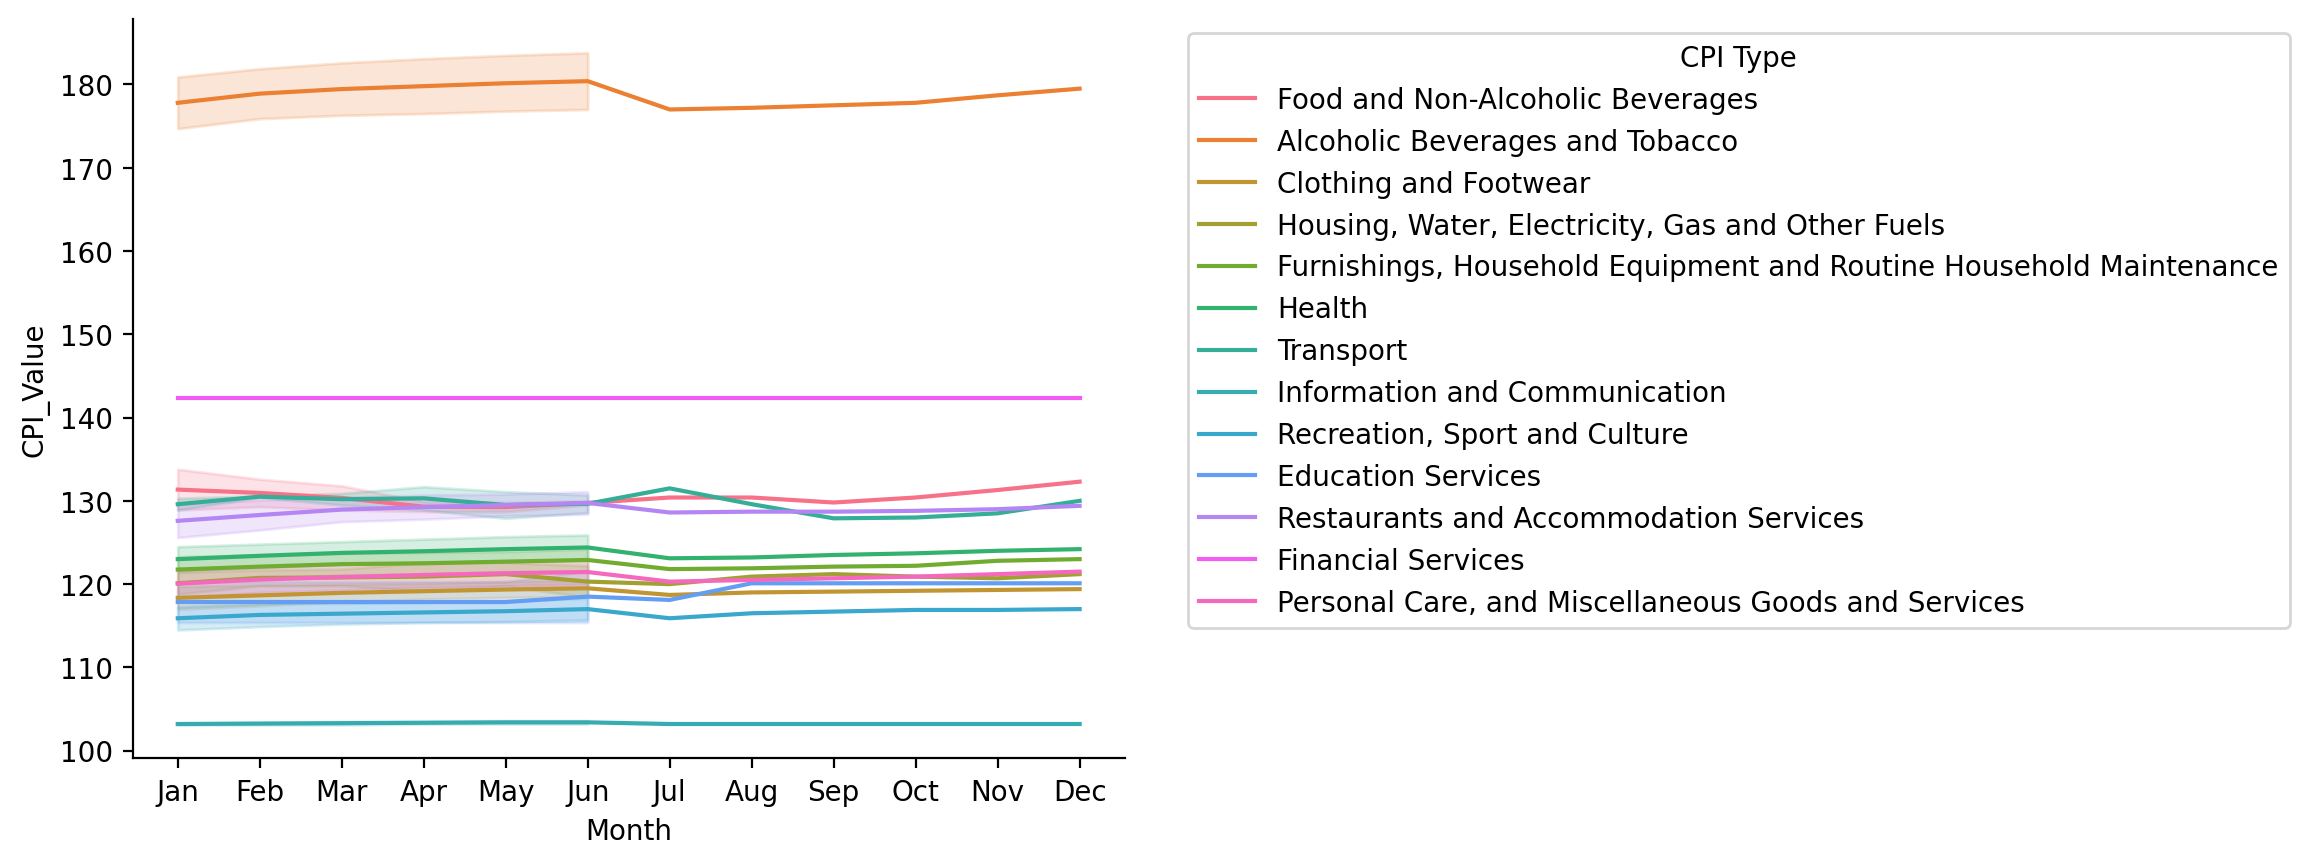

In [31]:
sns.lineplot(data=melt_df, x='Month', y='CPI_Value', hue='CPI_Type')

plt.legend(title='CPI Type', bbox_to_anchor=(1.05, 1), loc='upper left')

sns.despine()

Enhancing Figure

In [74]:
fig = px.line(
    data_frame=melt_df,
    x='Date',
    y='CPI_Value',
    color='CPI_Type',
    title='CPI Values by Month and Type',
    template='plotly_white'
)
fig.show()